In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import kpss


0.013705823708495608


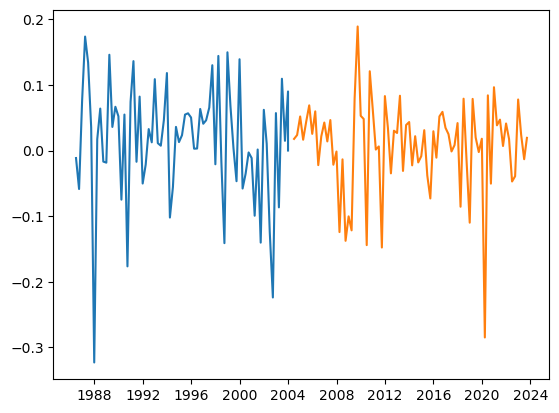

In [258]:
A_df86_04 = pd.read_excel('QFTSE_8604.xlsx' )
A_df04_23 = pd.read_excel('QFTSE_0423.xlsx')
A_RF = pd.read_excel('IRengland.xlsx')

df86_04 = A_df86_04.set_index('Date')
df04_23 = A_df04_23.set_index('Date')
df86_04['lnPrice'] = np.log(df86_04['Price'])
df04_23['lnPrice'] = np.log(df04_23['Price'])
df86_04['lnChange'] = np.log(df86_04['Price'] / df86_04['Price'].shift(1))
df04_23['lnChange'] = np.log(df04_23['Price'] / df04_23['Price'].shift(1))
returns86_04 = df86_04['lnChange'].dropna()
returns04_23 = df04_23['lnChange'].dropna()
lnprice8604 = df86_04['lnPrice']
lnprice04823 = df04_23['lnPrice']
r8604 = np.mean(returns86_04)
r0423 = np.mean(returns04_23)
std8604 = np.std(returns86_04)
std0423 =np.std(returns04_23)
print(r8604)
plt.plot(returns86_04)
plt.plot(returns04_23)


In [257]:
def check_stat(timeseries):
    adf = adfuller(timeseries)
    if adf[1]<0.01 : 
        print('the p-value: ', adf[1])
        print('T-statistic: ', adf[0])
        for key, value in adf[4].items():
            print(f'  {key}: {value}')
        print('There is strong evidence that the series is stationnary')
    else : 
        print('There is not enoguh evidence that the series is stationnary')
    
    kpss_stat, p_value, lags, critical_values = kpss(timeseries)

    print(f'KPSS Statistic: {kpss_stat}')
    print(f'P-value: {p_value}')
    print(f'Number of Lags Used: {lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key}: {value}')

    if p_value < 0.05:
        print('Reject the null hypothesis: The series is not stationary around a deterministic trend.')
    else:
        print('Fail to reject the null hypothesis: The series is stationary around a deterministic trend.')

In [247]:
check_stat(returns86_04)

the p-value:  5.442245606455048e-14
T-statistic:  -8.64050871925661
  1%: -3.526004646825607
  5%: -2.9032002348069774
  10%: -2.5889948363419957
There is strong evidence that the series is stationnary
KPSS Statistic: 0.1830897869309473
P-value: 0.1
Number of Lags Used: 3
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Fail to reject the null hypothesis: The series is stationary around a deterministic trend.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [248]:
check_stat(returns04_23)

the p-value:  0.0001852830191339789
T-statistic:  -4.514277803348858
  1%: -3.526004646825607
  5%: -2.9032002348069774
  10%: -2.5889948363419957
There is strong evidence that the series is stationnary
KPSS Statistic: 0.04711764553141878
P-value: 0.1
Number of Lags Used: 1
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Fail to reject the null hypothesis: The series is stationary around a deterministic trend.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


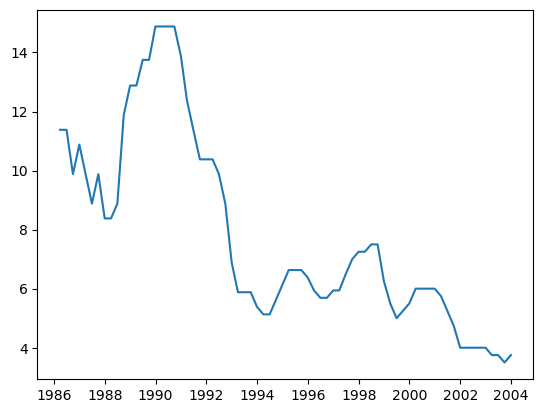

In [259]:

A_df04_23['Date'] = pd.to_datetime(A_df04_23['Date'])
A_df86_04['Date'] = pd.to_datetime(A_df86_04['Date'])
A_RF['Date'] = pd.to_datetime(A_RF['Date'])
A_df04_23_rf = A_df04_23.merge(RF, on='Date', how='left')
A_RF.head()
merged_data_8604 = pd.merge_asof(
    A_df86_04.sort_values(by='Date'),
   A_RF.sort_values(by='Date'),
    on='Date',
    direction='backward',  # Use the latest quarterly rate before the return date
)
merged_data_0423 = pd.merge_asof(
    A_df04_23.sort_values(by='Date'),
    A_RF.sort_values(by='Date'),
    on='Date',
    direction='backward',  # Use the latest quarterly rate before the return date
)
n = (merged_data_8604)
merged_data_8604.iloc[0:2,-1] = 11.38 #Replacing the NAN values with the periods interest rates
merged_data_8604
plt.plot(merged_data_8604.Date,merged_data_8604.Rate)

In [260]:
ndf8604 = merged_data_8604.set_index('Date')
ndf0423 = merged_data_0423.set_index('Date')

ndf8604['lnPrice'] = np.log(ndf8604['Price'])
ndf0423['lnPrice'] = np.log(ndf0423['Price'])
ndf8604['lnChange'] = np.log(ndf8604['Price'] / ndf8604['Price'].shift(1))
ndf0423['lnChange'] = np.log(ndf0423['Price'] / ndf0423['Price'].shift(1))
returns86_04 = ndf8604['lnChange'].dropna()
returns04_23 = ndf0423['lnChange'].dropna()
lnprice8604 = ndf8604['lnPrice']
lnprice04823 = ndf0423['lnPrice']

In [261]:
ndf8604['Excess returns'] = ndf8604['% Change'] - ndf8604['Rate']
ndf0423['Excess returns'] = ndf0423['% Change'] - ndf0423['Rate']


In [268]:
ndf0423.isna().sum()

Price                                    0
Change                                   0
% Change                                 0
Total Return (Gross, Unhedged)           0
Cumulative Return % (Gross, Unhedged)    0
Open                                     0
High                                     0
Low                                      0
Rate                                     0
lnPrice                                  0
lnChange                                 0
Excess returns                           0
dtype: int64

In [264]:
 ndf8604['% Change'].dropna()


Date
1986-06-30    -1.138543
1986-09-30    -5.697660
1986-12-31     7.918752
1987-03-31    18.975579
1987-06-30    14.342217
                ...    
2002-12-31     5.873853
2003-03-31    -8.300766
2003-06-30    11.565389
2003-09-30     1.491877
2003-12-31     9.423876
Name: % Change, Length: 71, dtype: float64

In [267]:
ndf8604.dropna(subset=['% Change'], inplace=True)
ndf0423.dropna(subset=['% Change'], inplace=True)

In [270]:
EXCESS_R_86_04 =ndf8604['Excess returns']
EXCESS_R_04_23 =ndf0423['Excess returns']

check_stat(EXCESS_R_86_04)
check_stat(EXCESS_R_04_23)

the p-value:  2.0487928339874876e-12
T-statistic:  -8.023297196615879
  1%: -3.5274258688046647
  5%: -2.903810816326531
  10%: -2.5893204081632653
There is strong evidence that the series is stationnary
KPSS Statistic: 0.3196514125217837
P-value: 0.1
Number of Lags Used: 1
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Fail to reject the null hypothesis: The series is stationary around a deterministic trend.
the p-value:  5.663717704294626e-13
T-statistic:  -8.242612510349081
  1%: -3.518281134660583
  5%: -2.899878185191432
  10%: -2.5872229937594873
There is strong evidence that the series is stationnary
KPSS Statistic: 0.15277686387373493
P-value: 0.1
Number of Lags Used: 3
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Fail to reject the null hypothesis: The series is stationary around a deterministic trend.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
